<a href="https://www.kaggle.com/code/piyushgone/singapore-resale-flat-prices-predicting-eda?scriptVersionId=150664705" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

 # **Singapore  Resale Flat Prices Predicting**

> **Skills take away From This Project:** Data Wrangling, EDA, Model Building, Model Deployment

> **Domain:** Real Estate



> ### **Problem Statement:**
The objective of this project is to develop a machine learning model and deploy it as a user-friendly web application that predicts the resale prices of flats in Singapore. This predictive model will be based on historical data of resale flat transactions, and it aims to assist both potential buyers and sellers in estimating the resale value of a flat.


 ### **Project Overview:**
This project encompasses a series of tasks aimed at creating a predictive model for resale flat transactions in Singapore, specifically focusing on data from the Housing and Development Board (HDB) spanning from 1990 to the present day.

### **Tasks:**

1. **Data Collection and Preprocessing:**
   - Gather a comprehensive dataset of resale flat transactions from HDB.
   https://beta.data.gov.sg/collections/189/view
   - Perform data preprocessing to clean and structure the dataset, preparing it for machine learning applications.

2. **Feature Engineering:**
   - Extract pertinent features from the dataset, such as town, flat type, storey range, floor area, flat model, and lease commence date.
   - Introduce additional features, if necessary, to augment prediction accuracy.

3. **Model Selection and Training:**
   - Choose a suitable machine learning regression model (e.g., linear regression, decision trees, or random forests).
   - Train the selected model on historical data, utilizing a portion of the dataset for training purposes.

4. **Model Evaluation:**
   - Assess the model's predictive performance using regression metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R2 Score.

5. **Streamlit Web Application:**
   - Develop an intuitive web application using Streamlit.
   - Enable users to input flat details (town, flat type, storey range, etc.) and utilize the trained model to predict the resale price based on user inputs.

6. **Deployment on Render:**
   - Deploy the Streamlit application on the Render platform to make it accessible to users over the internet.

7. **Testing and Validation:**
   - Conduct thorough testing of the deployed application to ensure its correct functionality and the delivery of accurate predictions.

# Step 0: Import and Reading Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot') 

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor
# import xgboost as xgb
# import lightgbm as lgb
# import joblib


import warnings

# warnings.filterwarnings("ignore", module="matplotlib")
# warnings.filterwarnings("ignore", module="seaborn")
warnings.filterwarnings("ignore")

In [2]:
df_90 = pd.read_csv(r'/kaggle/input/singapore-resale-flat-prices-data-set/ResaleFlatPricesBasedonApprovalDate19901999.csv')
df_00 = pd.read_csv(r'/kaggle/input/singapore-resale-flat-prices-data-set/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv')
df_12 = pd.read_csv(r'/kaggle/input/singapore-resale-flat-prices-data-set/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv')
df_15 = pd.read_csv(r'/kaggle/input/singapore-resale-flat-prices-data-set/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')


In [3]:
df = df_15
df.sample(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
96339,2021-04,SENGKANG,4 ROOM,453B,FERNVALE RD,22 TO 24,92.0,Model A,2015,93 years 04 months,510000.0
64605,2020-01,BUKIT MERAH,5 ROOM,120A,KIM TIAN PL,19 TO 21,115.0,Improved,2001,80 years 02 months,880000.0
138250,2022-10,QUEENSTOWN,3 ROOM,89,TANGLIN HALT RD,10 TO 12,60.0,Model A,2008,84 years 10 months,610000.0
3948,2017-03,WOODLANDS,4 ROOM,843,WOODLANDS ST 82,01 TO 03,84.0,Simplified,1994,76 years 03 months,305000.0
79675,2020-09,SENGKANG,5 ROOM,440B,FERNVALE LINK,16 TO 18,113.0,Improved,2015,93 years 11 months,565000.0
112617,2021-11,HOUGANG,5 ROOM,971,HOUGANG ST 91,10 TO 12,115.0,Improved,1999,77 years 01 month,548000.0
104695,2021-08,CLEMENTI,3 ROOM,312B,CLEMENTI AVE 4,16 TO 18,69.0,Model A,2017,95 years 01 month,570000.0
163908,2023-04,WOODLANDS,EXECUTIVE,516,WOODLANDS DR 14,07 TO 09,147.0,Premium Apartment,1999,75 years,770000.0
55350,2019-08,JURONG WEST,4 ROOM,183B,BOON LAY AVE,10 TO 12,92.0,Model A,2015,94 years 05 months,432000.0
151953,2023-06,JURONG EAST,3 ROOM,410,PANDAN GDNS,04 TO 06,86.0,Improved,1979,55 years,361000.0


### Step 1.1 - Understanding Data


In [4]:
df.shape

(165610, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165610 entries, 0 to 165609
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                165610 non-null  object 
 1   town                 165610 non-null  object 
 2   flat_type            165610 non-null  object 
 3   block                165610 non-null  object 
 4   street_name          165610 non-null  object 
 5   storey_range         165610 non-null  object 
 6   floor_area_sqm       165610 non-null  float64
 7   flat_model           165610 non-null  object 
 8   lease_commence_date  165610 non-null  int64  
 9   remaining_lease      165610 non-null  object 
 10  resale_price         165610 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 13.9+ MB


In [6]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,165610.000000,165610.000000,1.656100e+05
mean,97.336917,1995.813942,4.890781e+05
std,24.026524,13.911497,1.692073e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1985.000000,3.650000e+05
50%,93.000000,1996.000000,4.600000e+05
75%,112.000000,2009.000000,5.800000e+05
max,249.000000,2022.000000,1.500000e+06


# Step 1.2 - Data Preperation 

In [7]:
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [8]:
df.duplicated().sum()

278

In [9]:
df = df.drop_duplicates()

<Axes: >

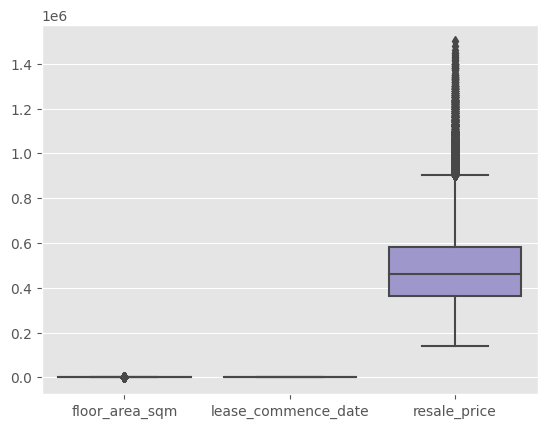

In [10]:
sns.boxplot(df) # checking outliers

<Axes: xlabel='resale_price'>

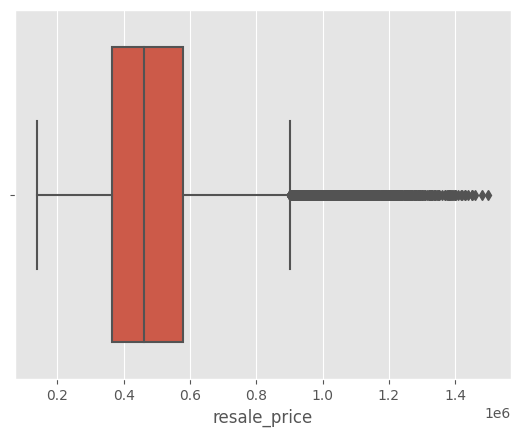

In [11]:
sns.boxplot(x = 'resale_price', data = df)

In [12]:
def remove_outliers(df, column_name):
    """
    Remove outliers from a specific column in a DataFrame using the IQR method.

    Parameters:
    - df: pandas DataFrame
    - column_name: Name of the column for outlier removal

    Returns:
    - DataFrame with outliers removed
    """

    # Calculate the first and third quartiles
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outlier removal
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return df_no_outliers

updated_df = remove_outliers(df, 'resale_price')


<Axes: xlabel='resale_price'>

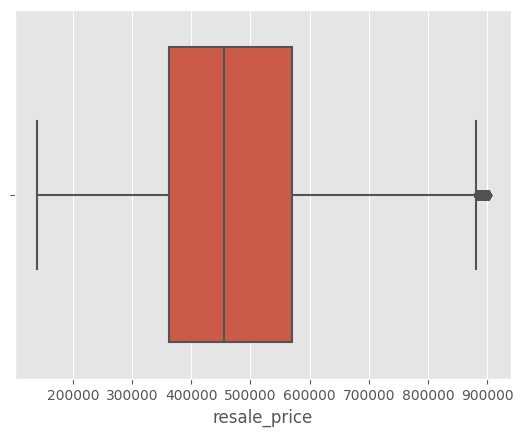

In [13]:
sns.boxplot(x = 'resale_price', data = updated_df)

In [14]:
c = round(((df_15.shape[0] - updated_df.shape[0]) / df_15.shape[0])*100 , 3)
print(f'Removed Outliers which consisted of {c} % of the orignal data')

Removed Outliers which consisted of 2.441 % of the orignal data


<Axes: >

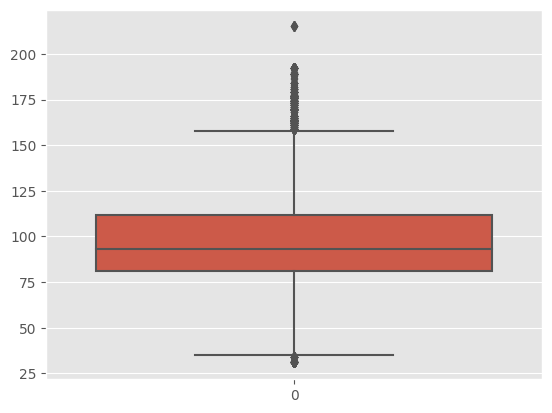

In [15]:
sns.boxplot(updated_df['floor_area_sqm'])

In [16]:
updated_df = remove_outliers(df, 'floor_area_sqm')

In [17]:
print(updated_df.shape)
print(f'Outliers removed: {round(((df_15.shape[0] - updated_df.shape[0]) / df_15.shape[0])*100 , 3)} %')

(164355, 11)
Outliers removed: 0.758 %


# Step 2: Feature Engineering:

In [18]:
df = updated_df
df = df[['flat_type',
         'storey_range',
         'floor_area_sqm', 
         'flat_model', 
         'lease_commence_date',
         'resale_price',
        'town']]
df.head()

,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,town
0,2 ROOM,10 TO 12,44.0,Improved,1979,232000.0,ANG MO KIO
1,3 ROOM,01 TO 03,67.0,New Generation,1978,250000.0,ANG MO KIO
2,3 ROOM,01 TO 03,67.0,New Generation,1980,262000.0,ANG MO KIO
3,3 ROOM,04 TO 06,68.0,New Generation,1980,265000.0,ANG MO KIO
4,3 ROOM,01 TO 03,67.0,New Generation,1980,265000.0,ANG MO KIO


In [19]:
df['age_of_flat'] = 2023 - df['lease_commence_date']
df['price_per_square_meter'] = df['resale_price'] / df['floor_area_sqm']
df['town'] = df.town.astype('category')
df['flat_type'] = df.flat_type.astype('category')

In [20]:
df.head()

,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,town,age_of_flat,price_per_square_meter
0,2 ROOM,10 TO 12,44.0,Improved,1979,232000.0,ANG MO KIO,44,5272.727273
1,3 ROOM,01 TO 03,67.0,New Generation,1978,250000.0,ANG MO KIO,45,3731.343284
2,3 ROOM,01 TO 03,67.0,New Generation,1980,262000.0,ANG MO KIO,43,3910.447761
3,3 ROOM,04 TO 06,68.0,New Generation,1980,265000.0,ANG MO KIO,43,3897.058824
4,3 ROOM,01 TO 03,67.0,New Generation,1980,265000.0,ANG MO KIO,43,3955.223881


In [21]:
df.to_csv('data.csv', index=False)

In [22]:
df = pd.read_csv(r'/kaggle/working/data.csv')

# Step 3: Exploratory Data Analysis (EDA):

#### Univarient analysis 

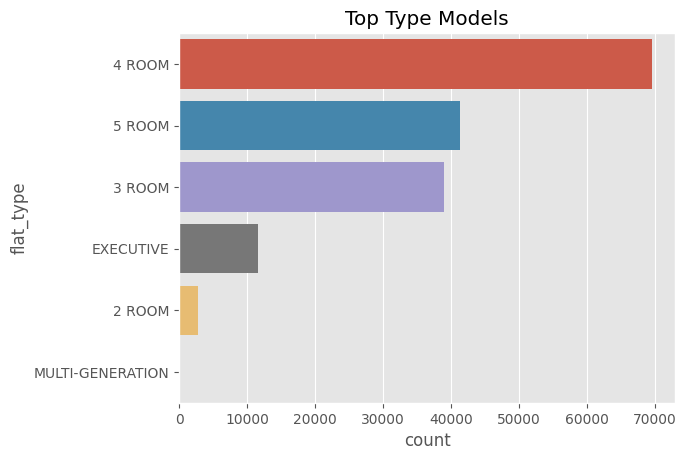

(Text(0.5, 1.0, 'Top Type Models'), None)

In [23]:
sns.countplot(data = df,
              y = 'flat_type',
              order = df['flat_type'].value_counts().index)
plt.title('Top Type Models'), plt.show()

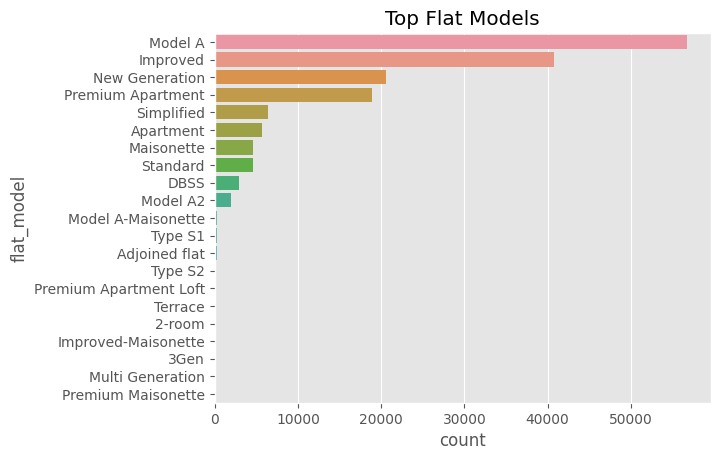

(Text(0.5, 1.0, 'Top Flat Models'), None)

In [24]:
sns.countplot(data = df,
              y = 'flat_model',
              order=df['flat_model'].value_counts().index), 
plt.title('Top Flat Models'), plt.show()

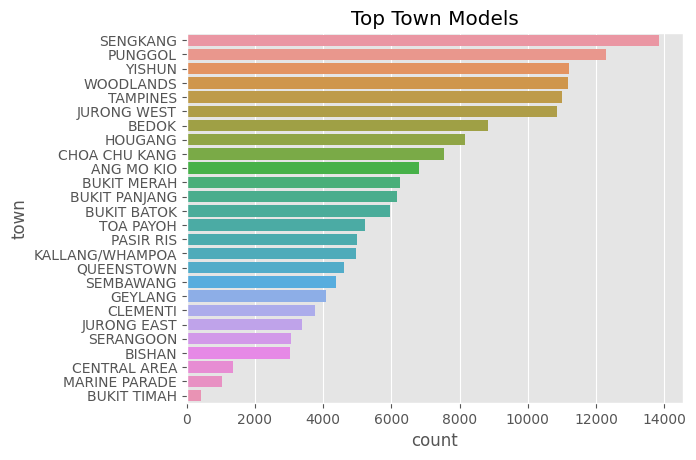

(Text(0.5, 1.0, 'Top Town Models'), None)

In [25]:
sns.countplot(data = df,
              y = 'town',
              order=df['town'].value_counts().index), 
plt.title('Top Town Models'), plt.show()

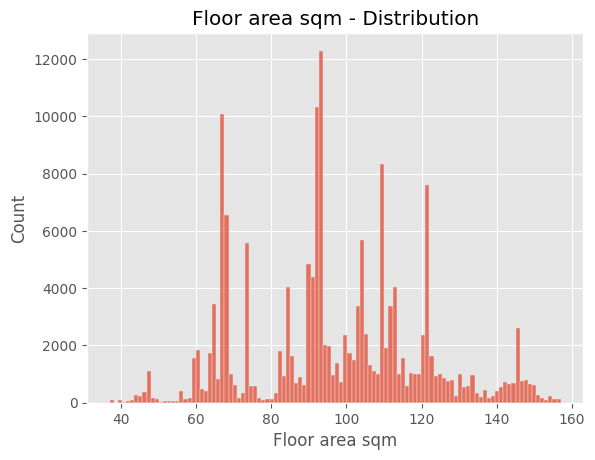

(Text(0.5, 1.0, 'Floor area sqm - Distribution'),
 Text(0.5, 28.0, 'Floor area sqm'),
 None)

In [26]:
sns.histplot(df['floor_area_sqm'])
               
plt.title('Floor area sqm - Distribution'), plt.xlabel('Floor area sqm') ,plt.show()

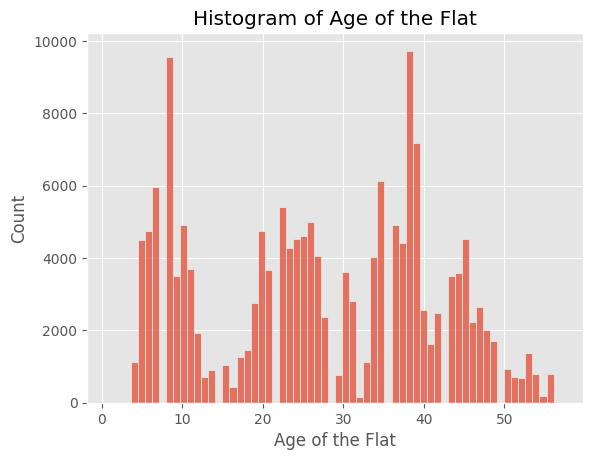

(Text(0.5, 28.0, 'Age of the Flat'),
 Text(0.5, 1.0, 'Histogram of Age of the Flat'),
 None)

In [27]:
sns.histplot(df['age_of_flat'])
plt.xlabel('Age of the Flat'), plt.title('Histogram of Age of the Flat'), plt.show()

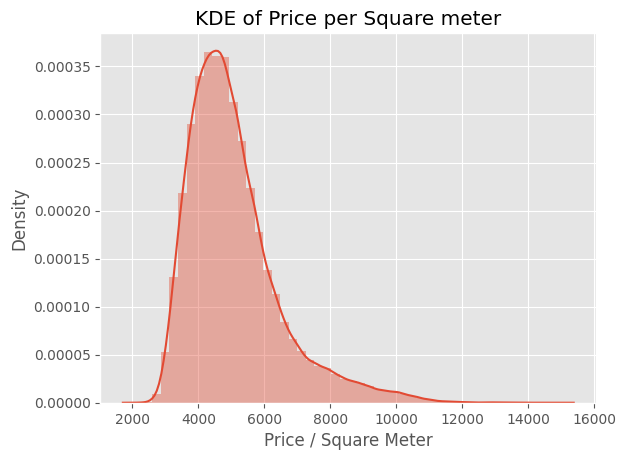

(Text(0.5, 28.0, 'Price / Square Meter'),
 Text(0.5, 1.0, 'KDE of Price per Square meter'),
 None)

In [28]:
sns.distplot(df['price_per_square_meter'])
plt.xlabel('Price / Square Meter'), plt.title('KDE of Price per Square meter'), plt.show()

#### Bivariate Analysis

<Axes: xlabel='resale_price', ylabel='floor_area_sqm'>

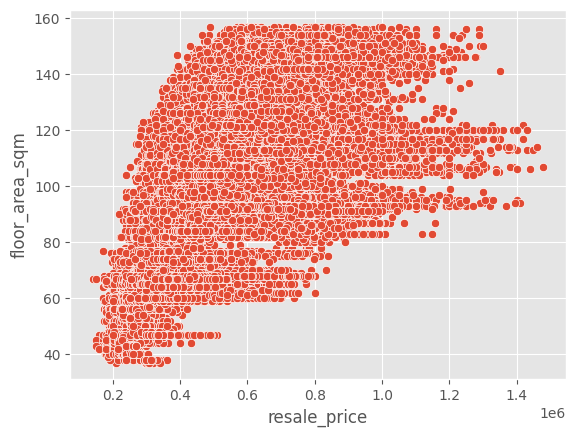

In [29]:
sns.scatterplot(x = 'resale_price',
                y = 'floor_area_sqm',
                data = df)

<Axes: xlabel='resale_price', ylabel='price_per_square_meter'>

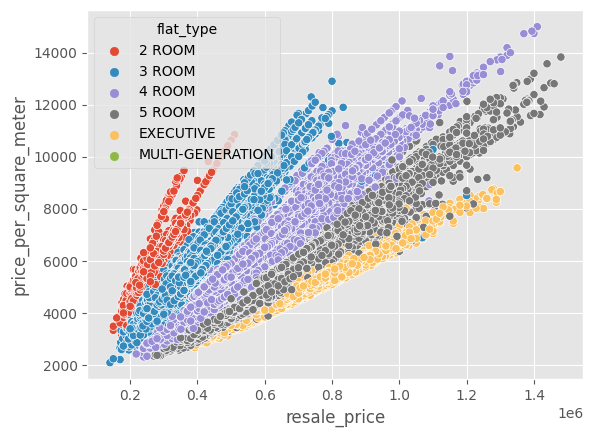

In [30]:
sns.scatterplot(x = 'resale_price',
                y = 'price_per_square_meter',
                hue = 'flat_type',
                data = df)

<Axes: xlabel='age_of_flat', ylabel='price_per_square_meter'>

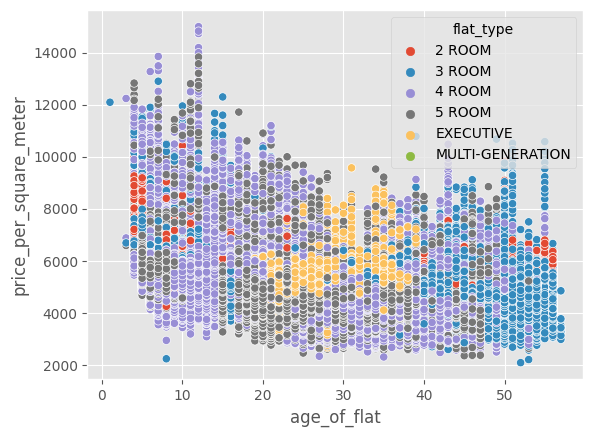

In [31]:
sns.scatterplot(x = 'age_of_flat',
                y = 'price_per_square_meter',
                hue = 'flat_type',
                data = df)

#### Multivariate Analysis 

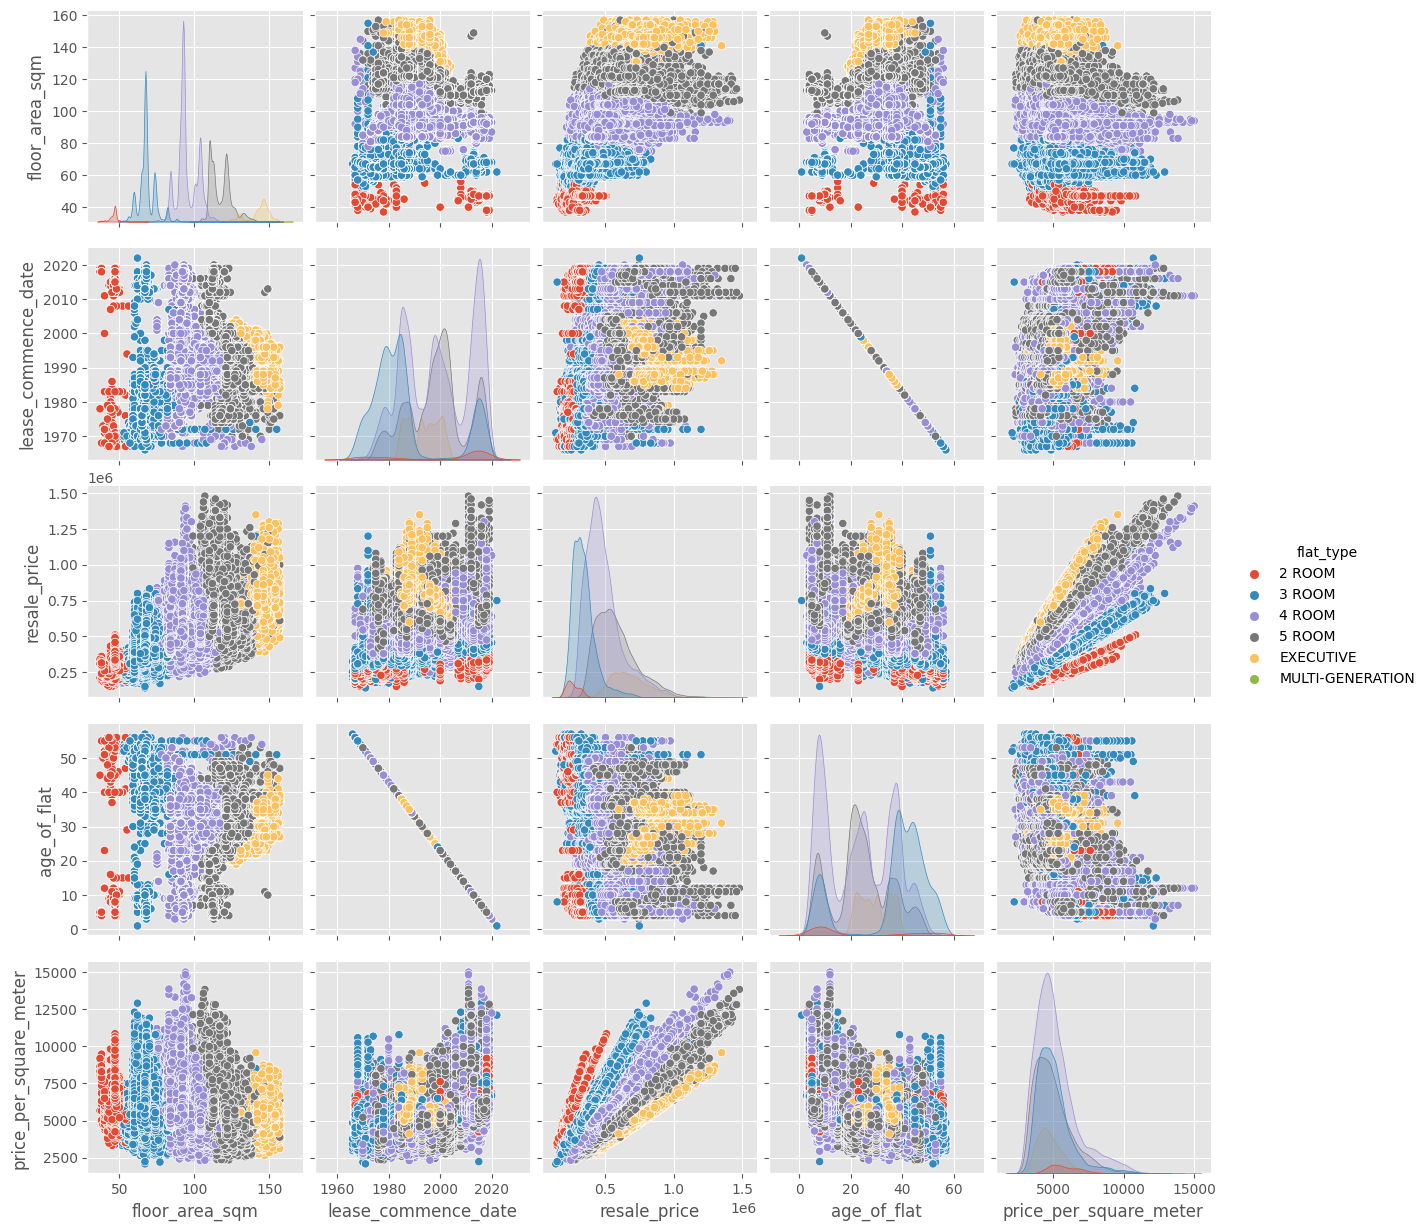

In [32]:
sns.pairplot(data = df, 
             hue = 'flat_type')

In [33]:
df_corr = df[['floor_area_sqm','age_of_flat','price_per_square_meter','resale_price']].corr()
df_corr

,floor_area_sqm,age_of_flat,price_per_square_meter,resale_price
floor_area_sqm,1.000000,-0.131217,-0.125702,0.595448
age_of_flat,-0.131217,1.000000,-0.384441,-0.371955
price_per_square_meter,-0.125702,-0.384441,1.000000,0.704368
resale_price,0.595448,-0.371955,0.704368,1.000000


<Axes: >

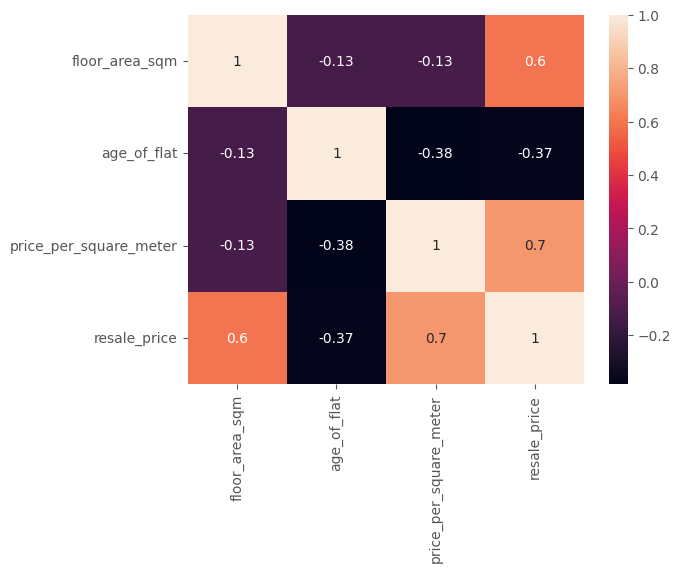

In [34]:
sns.heatmap(df_corr, annot=True)